In [2]:
import pandas as pd
import numpy as np
import time
from pandas import Series
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime, timedelta
import re
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels import tsa
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt
from pandas import TimeGrouper
from pandas import DataFrame
import warnings

In [3]:
df = pd.read_csv('Crime_Data.csv')
df.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)

In [5]:
mask1 = (df['date'] > '2007-12-31') & (df['date'] <'2018-01-01')
df1 = df.loc[mask1] 

In [6]:
#person = df1[df1['Crime Subcategory'].isin(['HOMICIDE','RAPE','ROBBERY-STREET','ROBBERY-COMMERCIAL',
 #                              'ROBBERY-RESIDENTIAL','AGGRAVATED ASSAULT-DV','AGGRAVATED ASSAULT'])]
#person.head()                                          

In [7]:
#person['Crime Subcategory'].value_counts()

In [8]:
group = df1.groupby(['date']).count()
group

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
date,,,,,,,,,,,
2008-01-01,178,178,178,178,178,178,178,178,170,170,178
2008-01-02,103,103,103,103,103,103,103,103,102,102,103
2008-01-03,116,116,116,116,116,116,116,116,114,114,116
2008-01-04,114,114,114,114,114,113,114,114,112,112,114
2008-01-05,104,104,104,104,104,104,104,104,103,103,104
2008-01-06,95,95,95,95,95,95,95,95,95,95,95
2008-01-07,105,105,105,105,105,105,105,105,105,105,105
2008-01-08,114,114,114,114,114,114,114,114,113,113,114
2008-01-09,131,131,131,131,131,128,131,131,128,128,131


In [9]:
# Creating rows for days with no crimes
idx = pd.date_range('01-01-2008', '08-19-2018')
group.index = pd.DatetimeIndex(group.index)
group = group.reindex(idx, fill_value=0)

In [10]:
group['date']=group.index

In [11]:
d=group[['date','Crime Subcategory']]
d.head()

,date,Crime Subcategory
2008-01-01,2008-01-01,178
2008-01-02,2008-01-02,103
2008-01-03,2008-01-03,116
2008-01-04,2008-01-04,113
2008-01-05,2008-01-05,104


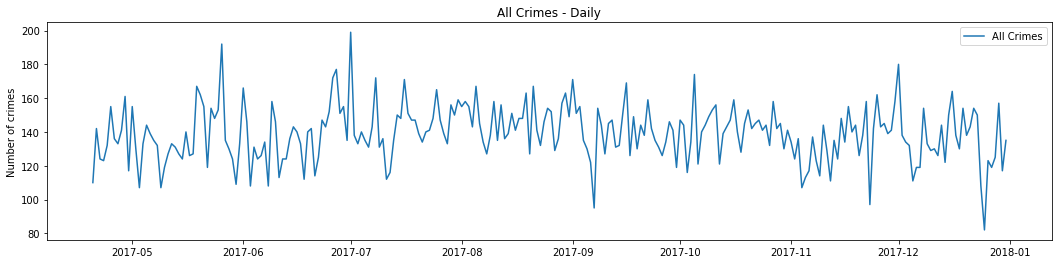

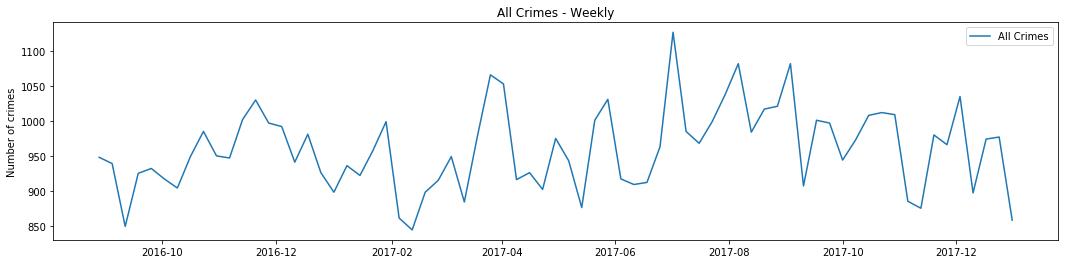

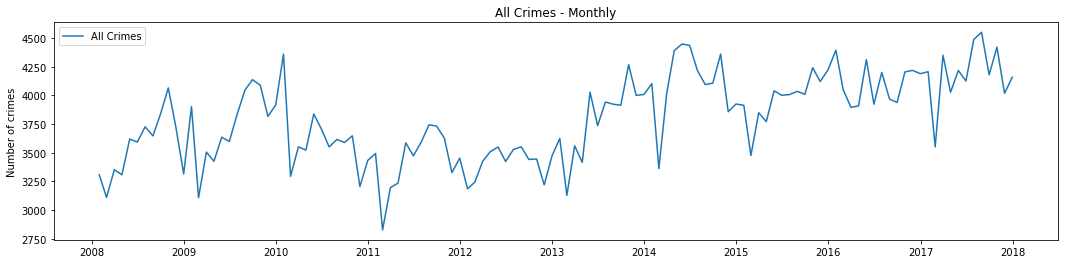

In [12]:
maskd = (d['date'] > '2017-04-19') & (d['date'] < '2018-01-01')
dd = d.loc[maskd] 
plt.figure(figsize=[18,4]) 

plt.plot(dd['Crime Subcategory'], label = 'All Crimes')
plt.ylabel('Number of crimes')
plt.title('All Crimes - Daily')
plt.legend(loc='best')

maskw = (d['date'] > '2016-08-21')& (d['date'] < '2018-01-01')
dw = d.loc[maskw] 
dwr = dw.resample('W').sum()
plt.figure(figsize=[18,4]) 

plt.plot(dwr['Crime Subcategory'], label = 'All Crimes')
plt.ylabel('Number of crimes')
plt.title('All Crimes - Weekly')
plt.legend(loc='best')

maskm =  (d['date'] < '2018-01-01')
dm = d.loc[maskm] 
dmr = dm.resample('M').sum()
plt.figure(figsize=[18,4]) 
plt.plot(dmr['Crime Subcategory'], label = 'All Crimes')
plt.ylabel('Number of crimes')
plt.title('All Crimes - Monthly')
plt.legend(loc='best')

In [13]:
dmr.head()

,Crime Subcategory
2008-01-31,3309
2008-02-29,3111
2008-03-31,3353
2008-04-30,3308
2008-05-31,3620


In [14]:
split_point = len(dmr) - 12
dataset, validation = dmr[0:split_point], dmr[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 108, Validation 12


In [15]:
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [16]:
len(test)

54

In [17]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=3424.000, Expected=3529
>Predicted=3529.000, Expected=3552
>Predicted=3552.000, Expected=3442
>Predicted=3442.000, Expected=3446
>Predicted=3446.000, Expected=3220
>Predicted=3220.000, Expected=3473
>Predicted=3473.000, Expected=3625
>Predicted=3625.000, Expected=3129
>Predicted=3129.000, Expected=3561
>Predicted=3561.000, Expected=3416
>Predicted=3416.000, Expected=4028
>Predicted=4028.000, Expected=3736
>Predicted=3736.000, Expected=3942
>Predicted=3942.000, Expected=3923
>Predicted=3923.000, Expected=3914
>Predicted=3914.000, Expected=4267
>Predicted=4267.000, Expected=4000
>Predicted=4000.000, Expected=4008
>Predicted=4008.000, Expected=4102
>Predicted=4102.000, Expected=3362
>Predicted=3362.000, Expected=4016
>Predicted=4016.000, Expected=4390
>Predicted=4390.000, Expected=4448
>Predicted=4448.000, Expected=4435
>Predicted=4435.000, Expected=4216
>Predicted=4216.000, Expected=4094
>Predicted=4094.000, Expected=4107
>Predicted=4107.000, Expected=4360
>Predicted=4360.000,

In [18]:
avg = dataset.mean()
avg

Crime Subcategory    3749.805556
dtype: float64

In [19]:
avgs = test*0 + 3749.805556
mse = mean_squared_error(test, avgs)
rmse = sqrt(mse)
rmse

365.5560618769712

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


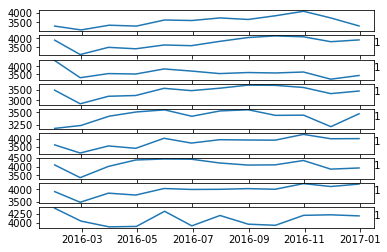

In [20]:
groups = dataset['2008':'2017'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

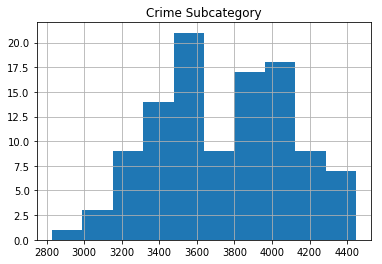

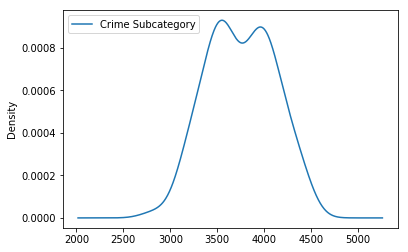

In [21]:
dataset.hist()
dataset.plot(kind='kde')

ADF Statistic: -3.297857
p-value: 0.014975
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584


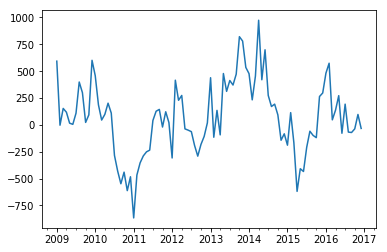

ADF Statistic: -1.076604
p-value: 0.724311
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


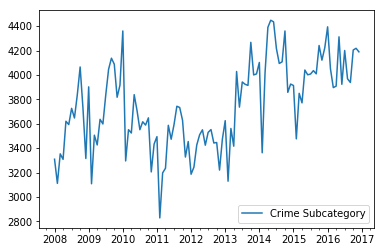

In [22]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
    
series = dataset['Crime Subcategory']
X = series.values
X = X.astype('float32') 

# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
#stationary = pd.DataFrame(stationary)
stationary.index = series.index[months_in_year:]

#check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# plot
stationary.plot()
pyplot.show()

#check if stationary
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# plot
dataset.plot()
pyplot.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


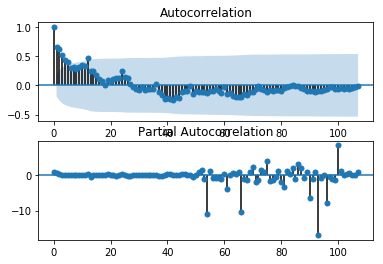

In [23]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [24]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

predictions = []
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    

>Predicted=4389.248, Expected=3529
>Predicted=3491.854, Expected=3552
>Predicted=3400.043, Expected=3442
>Predicted=3440.395, Expected=3446
>Predicted=3846.932, Expected=3220
>Predicted=3059.549, Expected=3473
>Predicted=3596.179, Expected=3625
>Predicted=3378.796, Expected=3129
>Predicted=3200.122, Expected=3561
>Predicted=3677.239, Expected=3416
>Predicted=3544.247, Expected=4028
>Predicted=3774.891, Expected=3736
>Predicted=3109.463, Expected=3942
>Predicted=3580.310, Expected=3923
>Predicted=3735.815, Expected=3914
>Predicted=3863.532, Expected=4267
>Predicted=3890.860, Expected=4000
>Predicted=4245.529, Expected=4008
>Predicted=4256.623, Expected=4102
>Predicted=3648.045, Expected=3362
>Predicted=3897.099, Expected=4016
>Predicted=3801.374, Expected=4390
>Predicted=4784.314, Expected=4448
>Predicted=4326.871, Expected=4435
>Predicted=4566.254, Expected=4216
>Predicted=4360.311, Expected=4094
>Predicted=4161.207, Expected=4107
>Predicted=4466.335, Expected=4360
>Predicted=4135.012,

In [24]:
#report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 303.173


In [29]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=292.741
ARIMA(0, 0, 2) RMSE=258.290
ARIMA(0, 0, 3) RMSE=248.544
ARIMA(0, 0, 4) RMSE=260.170
ARIMA(0, 0, 5) RMSE=253.914
ARIMA(0, 1, 1) RMSE=239.387
ARIMA(0, 1, 2) RMSE=241.042
ARIMA(0, 1, 3) RMSE=244.470
ARIMA(0, 1, 4) RMSE=258.524
ARIMA(0, 1, 5) RMSE=261.209
ARIMA(0, 1, 6) RMSE=269.767
ARIMA(0, 2, 1) RMSE=256.894
ARIMA(1, 0, 0) RMSE=241.594
ARIMA(1, 0, 1) RMSE=234.260
ARIMA(1, 0, 2) RMSE=235.480
ARIMA(1, 1, 0) RMSE=240.104
ARIMA(1, 1, 1) RMSE=242.203
ARIMA(1, 2, 0) RMSE=318.131
ARIMA(2, 0, 0) RMSE=233.896
ARIMA(2, 0, 1) RMSE=238.676
ARIMA(2, 1, 0) RMSE=242.559
ARIMA(2, 1, 1) RMSE=244.197
ARIMA(2, 2, 0) RMSE=296.819
ARIMA(3, 0, 0) RMSE=235.942
ARIMA(3, 0, 1) RMSE=239.872
ARIMA(3, 1, 0) RMSE=245.905
ARIMA(3, 1, 1) RMSE=246.262
ARIMA(3, 2, 0) RMSE=299.663
ARIMA(3, 2, 1) RMSE=254.608
ARIMA(3, 2, 2) RMSE=259.673
ARIMA(4, 0, 0) RMSE=239.892
ARIMA(4, 0, 1) RMSE=240.657
ARIMA(4, 1, 0) RMSE=246.557
ARIMA(4, 1, 1) RMSE=249.067
ARIMA(4, 2, 0) RMSE=279.310
ARIMA(4, 2, 1) RMSE=

                0
count   54.000000
mean     0.814129
std    306.019124
min   -860.248011
25%   -176.965544
50%     12.459911
75%    176.315922
max    832.536990


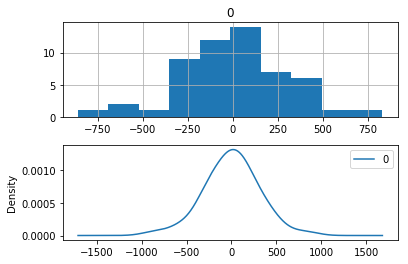

In [25]:
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


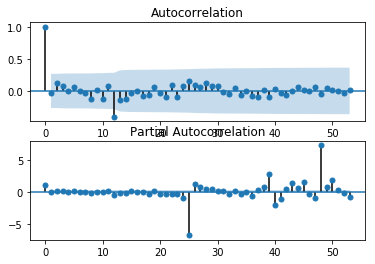

In [26]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

>Predicted=3452.368, Expected=4206
>Predicted=4594.151, Expected=3551
>Predicted=3603.881, Expected=4350
>Predicted=4175.312, Expected=4027
>Predicted=4018.944, Expected=4217
>Predicted=3999.444, Expected=4125
>Predicted=4369.932, Expected=4486
>Predicted=4409.202, Expected=4550
>Predicted=4433.947, Expected=4179
>Predicted=4305.580, Expected=4420
>Predicted=3647.788, Expected=4018
>Predicted=4637.163, Expected=4158
RMSE: 480.264


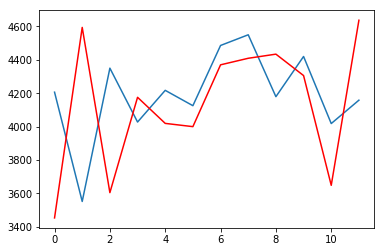

In [28]:
# load and prepare datasets

y = validation.values.astype('float32')

# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,0,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [44]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = dmr
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=308.639
ARIMA(0, 0, 2) RMSE=284.930
ARIMA(0, 0, 3) RMSE=279.968
ARIMA(0, 0, 4) RMSE=285.124
ARIMA(0, 0, 5) RMSE=270.030
ARIMA(0, 1, 1) RMSE=269.919
ARIMA(0, 1, 2) RMSE=271.075
ARIMA(0, 1, 3) RMSE=275.569
ARIMA(0, 1, 4) RMSE=280.020
ARIMA(0, 1, 5) RMSE=277.752
ARIMA(0, 1, 6) RMSE=280.003
ARIMA(0, 2, 1) RMSE=294.146
ARIMA(1, 0, 0) RMSE=271.068
ARIMA(1, 0, 1) RMSE=262.759
ARIMA(1, 0, 2) RMSE=263.999
ARIMA(1, 1, 0) RMSE=273.973
ARIMA(1, 1, 1) RMSE=272.014
ARIMA(1, 2, 0) RMSE=373.284
ARIMA(2, 0, 0) RMSE=263.329
ARIMA(2, 0, 1) RMSE=266.975
ARIMA(2, 1, 0) RMSE=274.448
ARIMA(2, 1, 1) RMSE=273.937
ARIMA(2, 2, 0) RMSE=345.494
ARIMA(3, 0, 0) RMSE=265.186
ARIMA(3, 0, 1) RMSE=268.114
ARIMA(3, 1, 0) RMSE=274.792
ARIMA(3, 1, 1) RMSE=275.059
ARIMA(3, 2, 0) RMSE=335.934
ARIMA(3, 2, 1) RMSE=281.427
ARIMA(3, 2, 2) RMSE=283.601
ARIMA(4, 0, 0) RMSE=267.362
ARIMA(4, 0, 1) RMSE=268.084
ARIMA(4, 1, 0) RMSE=275.593
ARIMA(4, 1, 1) RMSE=277.073
ARIMA(4, 2, 0) RMSE=306.133
ARIMA(4, 2, 1) RMSE=

## Modeling

In [ ]:
lag_acf = acf(person7all['Crime Subcategory'], nlags=20)
lag_pacf = pacf(person7all['Crime Subcategory'], nlags=20, method='ols')

In [ ]:
plt.figure(figsize=[18,4]) 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(person7all['Crime Subcategory'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(person7all['Crime Subcategory'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(person7all['Crime Subcategory'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(person7all['Crime Subcategory'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
model = ARIMA(person7all['Crime Subcategory'], order=(0, 0, 1))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=[18,4]) 
plt.plot(person7all['Crime Subcategory'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-person7all['Crime Subcategory'])**2))


In [ ]:
model = ARIMA(person7all['Crime Subcategory'], order=(1, 0, 0))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=[18,4]) 
plt.plot(person7all['Crime Subcategory'])
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-person7all['Crime Subcategory'])**2))

In [ ]:
model = ARIMA(person7all['Crime Subcategory'], order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=[18,4])
plt.plot(person7all['Crime Subcategory'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-person7all['Crime Subcategory'])**2))

In [ ]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(person7all['Crime Subcategory'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [6]:
exog.shape

(8, 4)